In [1]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\franc\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
#importing packages

import pandas as pd
import numpy as np

#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt
from datetime import datetime as dt2
from datetime import timedelta as td
from datetime import time as tm

# for modelling
from scipy import stats #for statistics
from sklearn.preprocessing import StandardScaler # for scaling by removing the mean and scaling to unit variance 
from sklearn.manifold import TSNE #for visualizing high-dimensional data

import plotly.offline as pyoff
import plotly.graph_objs as go

import feature_engine
from feature_engine.outliers import Winsorizer

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the data set and encode
data= pd.read_csv('data.csv',encoding="ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.shape

(541909, 8)

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [9]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
data['Country'].value_counts(normalize=True)

United Kingdom          0.914320
Germany                 0.017521
France                  0.015790
EIRE                    0.015124
Spain                   0.004674
Netherlands             0.004375
Belgium                 0.003818
Switzerland             0.003694
Portugal                0.002803
Australia               0.002323
Norway                  0.002004
Italy                   0.001482
Channel Islands         0.001399
Finland                 0.001283
Cyprus                  0.001148
Sweden                  0.000853
Unspecified             0.000823
Austria                 0.000740
Denmark                 0.000718
Japan                   0.000661
Poland                  0.000629
Israel                  0.000548
USA                     0.000537
Hong Kong               0.000531
Singapore               0.000423
Iceland                 0.000336
Canada                  0.000279
Greece                  0.000269
Malta                   0.000234
United Arab Emirates    0.000125
European C

In [11]:
#Since 90 percent of our customer is from UK, we will use UK customers for the analysis
data2 = data[data['Country']=='United Kingdom']

In [12]:
data2.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom
541893,581586,20685,DOORMAT RED RETROSPOT,10,12/9/2011 12:49,7.08,13113.0,United Kingdom


In [13]:
#Eliminating those with negatives in our Quantity feature
data2 = data2[data2['Quantity'] > 0 ]
data2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,12/9/2011 12:31,1.95,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,12/9/2011 12:49,1.25,13113.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,12/9/2011 12:49,8.95,13113.0,United Kingdom


In [14]:
#data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])
#data2

In [15]:
#data2['InvoiceYearMonth'] = data2['InvoiceDate'].map(lambda date: 100*date.year + date.month)
#data2

In [16]:
#data2['Date'] = data2['InvoiceDate'].dt.strftime('%Y-%m')
#data2

In [17]:
#Seperating invoice date from time
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])
data2['InvoiceYearMonth'] = data2['InvoiceDate'].map(lambda date: 100*date.year + date.month)
data2['Date'] = data2['InvoiceDate'].dt.strftime('%Y-%m')

In [18]:
print(data2['InvoiceDate'].min())
print(data2['InvoiceDate'].max())
#Print this is a 1 year transaction

2010-12-01 08:26:00
2011-12-09 12:49:00


In [19]:
data2.isnull().sum()

InvoiceNo                0
StockCode                0
Description            592
Quantity                 0
InvoiceDate              0
UnitPrice                0
CustomerID          131941
Country                  0
InvoiceYearMonth         0
Date                     0
dtype: int64

In [20]:
data2.shape

(486286, 10)

In [21]:
#Remove null values in unit price
data2 = data2[data2['UnitPrice'] > 0]

In [22]:
data2.shape

(485123, 10)

In [23]:
#remove the null values in customer id

data2 = data2[pd.notnull(data2['CustomerID'])]


In [24]:
data2.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country             0
InvoiceYearMonth    0
Date                0
dtype: int64

## Exploratory Data Analysis

Question 1

How many product sold every month

In [25]:
#Aggregating the Orders by Month

data2_agg = data2.groupby('Date').Quantity.sum()
data2_agg.head()

Date
2010-12    267767
2011-01    278251
2011-02    213375
2011-03    276304
2011-04    260448
Name: Quantity, dtype: int64

In [26]:
#converting series to dataframe and resetting index
data2_agg = pd.DataFrame(data2_agg)
data2_agg = data2_agg.reset_index()
data2_agg.head()

,Date,Quantity
0,2010-12,267767
1,2011-01,278251
2,2011-02,213375
3,2011-03,276304
4,2011-04,260448


In [27]:
def plot_data(data2,x,y, title='',xlabel='Date',ylabel='Quantity',dpi=100):
    plt.figure(figsize=(16,5),dpi=dpi)
    plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
    plt.plot(x,y,color='tab:Blue',marker='x')
    plt.show()

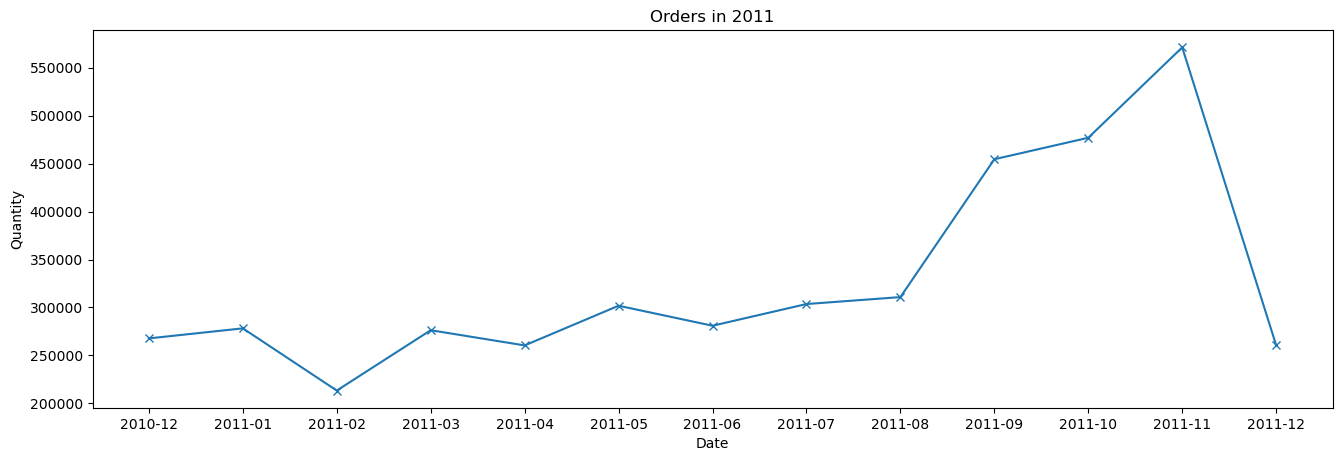

In [28]:
plot_data(data2_agg,x=data2_agg['Date'],y=data2_agg['Quantity'],title='Orders in 2011')

### How much customer spend their money every month

In [29]:
#Calculating Revenue


data2['Revenue'] = data2['Quantity']*data2['UnitPrice']

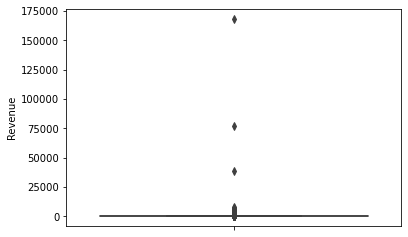

In [30]:
##QUESTION: CAN BOX PLOT BE ADJUSTED SUCH THAT THE COUNTSB WILL BE OF LOWER VALUES CONSIDERING THE DATA VALUES. 
sns.boxplot(y=data2['Revenue']);

In [31]:
data2['Revenue'].value_counts() 

15.00      16995
17.70       7513
1.25        7421
16.50       7261
3.75        6751
           ...  
2704.00        1
615.00         1
3035.52        1
211.68         1
66.36          1
Name: Revenue, Length: 2792, dtype: int64

In [34]:
data2_revenue = data2.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
data2_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,498661.850
1,201101,442190.060
2,201102,355655.630
3,201103,467198.590
4,201104,409559.141


In [40]:
plot_data= [
    go.Scatter(
    x=data2_revenue['InvoiceYearMonth'],
    y=data2_revenue['Revenue'],
    mode='lines+markers'
    )
]
plot_layout = go.Layout(
    xaxis={'type':'category'},
    title= 'Monthly Revenue'
           )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## RFM Analysis

* Recency Frequency Monetary
* RFM analysis allows you to segment customers by the frequency and value of purchases and identify the customers who spend the most money.
* Recency - how long its been sincve a customer bought something from us.
* Frequency - how often a customer buys from us
* Monetary Value - the total value of purchases a customer has made

we will use the last invoice date to calculate recency